In [1]:
import matplotlib.pylab as plt
import numpy as np
import scipy.integrate

In [2]:
def potential(x):
    return -x*x/4 + x*x*x*x/8

def dV(x):
    return -0.5*x+0.5*x*x*x

def rhs(t, y, gamma, f , omega):
    dy1 = y[1]
    dy2 = -gamma*y[1] - dV(y[0]) + f * np.cos(omega *t) 
    return [dy1, dy2]

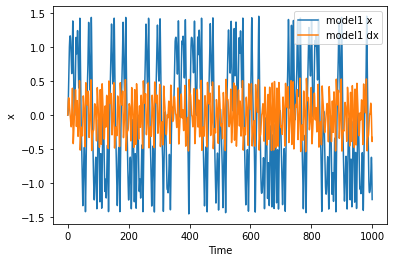

In [6]:
t_eval = np.linspace(0, 1000, 10000)
# Initial conditions
# x(0) = dx(0)/dt = 0
y0 = np.array([0.0, 0.0])

model1_args = {
    'name': 'model1',
    'gamma': 0.22,
    'f': .16,
    'omega': 0.833,
}

model2_args = {
    'name': 'model2',
    'gamma': 0.19,
    'f': .16,
    'omega': 0.833,
}

model3_args = {
    'name': 'model3',
    'gamma': 0.22,
    'f': .16,
    'omega': 0.833,
}

fig = plt.figure()
for model in [model1_args]:
    args = [
        model['gamma'], model['f'], model['omega']
    ]
    sol = scipy.integrate.solve_ivp(
        fun=lambda t, y: rhs(t, y, *args),
        t_span=[t_eval[0], t_eval[-1]],
        y0=y0, t_eval=t_eval
    )
    plt.plot(sol.t, sol.y[0, :], label=model['name'] + ' x')
    plt.plot(sol.t, sol.y[1, :], label=model['name'] + ' dx')

plt.legend()
plt.ylabel('x')
plt.xlabel('Time')
plt.show()

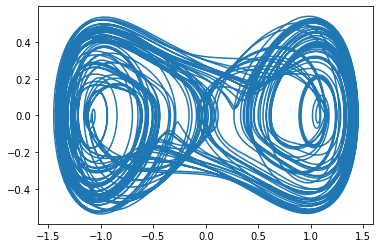

In [7]:
 plt.plot(sol.y[0, :], sol.y[1, :])